In [2]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [5]:
df.isnull().sum()


ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [6]:
df.drop('fec_hos_', axis=1, inplace=True)
df.drop('fecha_defuncion', axis=1, inplace=True)
df.drop('certif_defuncion', axis=1, inplace=True)



In [7]:
df.dropna(subset=['cod_ase_'], inplace=True)
df.dropna(subset=['fecha_contagio'], inplace=True)
df.dropna(subset=['inicio_sintomas'], inplace=True)


In [8]:
df['fec_not'] = pd.to_datetime(df['fec_not'])
df['mes_not'] = df['fec_not'].dt.month


/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '25/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [9]:
df['sexo_'] = df['sexo_'].replace({'M': 0, 'F': 1})


In [10]:
df['tip_ss_'] = df['tip_ss_'].replace({'Contributivo': 0, 'Especial': 1,'Subsidiado': 2, 'Particular': 3})



                    

In [11]:
df['conducta'] = df['conducta'].replace({'1. Ambulatorio': 0, '2. Hospitalizacion piso': 1,'4. Observacion': 2, '3. UCI': 3})


In [12]:
print(df['conducta'].unique())


[0 1 2 3]


In [13]:
df['fecha_contagio'] = pd.to_datetime(df['fecha_contagio'])
df['mes_cont'] = df['fecha_contagio'].dt.month

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [14]:
df['inicio_sintomas'] = pd.to_datetime(df['inicio_sintomas'])
df['mes_cont'] = df['inicio_sintomas'].dt.month

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [15]:
df.drop('fecha_nacimiento', axis=1, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1261
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1251 non-null   int64         
 1   fec_not            1251 non-null   datetime64[ns]
 2   semana             1251 non-null   int64         
 3   año                1251 non-null   int64         
 4   edad_              1251 non-null   int64         
 5   uni_med_           1251 non-null   int64         
 6   sexo_              1251 non-null   int64         
 7   cod_pais_o         1251 non-null   int64         
 8   cod_dpto_o         1251 non-null   int64         
 9   cod_mun_o          1251 non-null   int64         
 10  area_              1251 non-null   int64         
 11  ocupacion_         1251 non-null   int64         
 12  tip_ss_            1251 non-null   int64         
 13  cod_ase_           1251 non-null   object        
 14  gp_disca

In [17]:
df.drop('cod_ase_', axis=1, inplace=True)


In [18]:
columnas = ['longitud', 'latitud']
datos = df[columnas].values

In [20]:
print(datos)

[[-73.10250092   7.07601118]
 [-73.10540009   7.07949543]
 [-73.09100342   7.09029007]
 ...
 [-73.10326385   7.09139061]
 [-73.09700012   7.06108332]
 [-73.08044434   7.06252098]]


In [21]:
datos[:10]

array([[-73.10250092,   7.07601118],
       [-73.10540009,   7.07949543],
       [-73.09100342,   7.09029007],
       [-73.09095764,   7.06743479],
       [-73.10498047,   7.06690502],
       [-73.08882141,   7.07336807],
       [-73.08918762,   7.0809474 ],
       [-73.08595276,   7.0840869 ],
       [-73.10229492,   7.08333302],
       [-73.09792328,   7.06743145]])

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(datos)
scaled_features[:10]

array([[-0.90433071, -0.15196033],
       [-1.26827459,  0.17029219],
       [ 0.53899437,  1.16867089],
       [ 0.54474131, -0.94517698],
       [-1.21559809, -0.99417417],
       [ 0.81291041, -0.3964171 ],
       [ 0.76693868,  0.30458244],
       [ 1.173023  ,  0.59494932],
       [-0.87847074,  0.52522419],
       [-0.32968208, -0.9454857 ]])

In [60]:
kmeans = KMeans(
  init="random",
  n_clusters=4,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [61]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [62]:
kmeans.inertia_

662.5347345490634

In [63]:
kmeans.cluster_centers_

array([[ 1.18872168, -0.86555193],
       [-0.53492634, -1.08526279],
       [-1.07092049,  0.26166929],
       [ 0.4502539 ,  1.01104812]])

In [64]:
kmeans.n_iter_

6

In [65]:
kmeans.labels_

array([2, 2, 3, ..., 2, 1, 0], dtype=int32)

In [66]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}


In [67]:

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

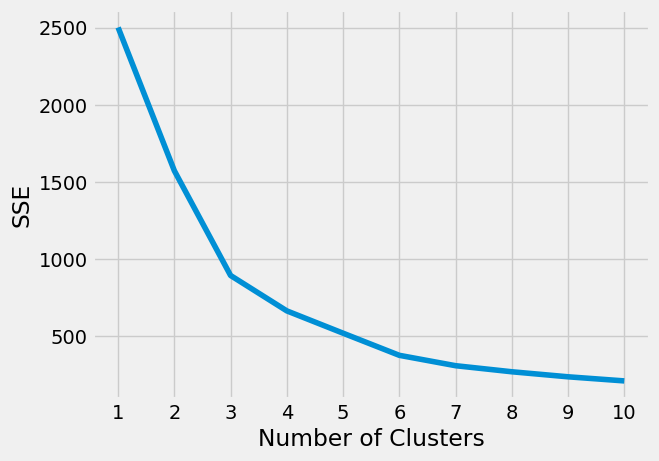

In [68]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [69]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

In [75]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

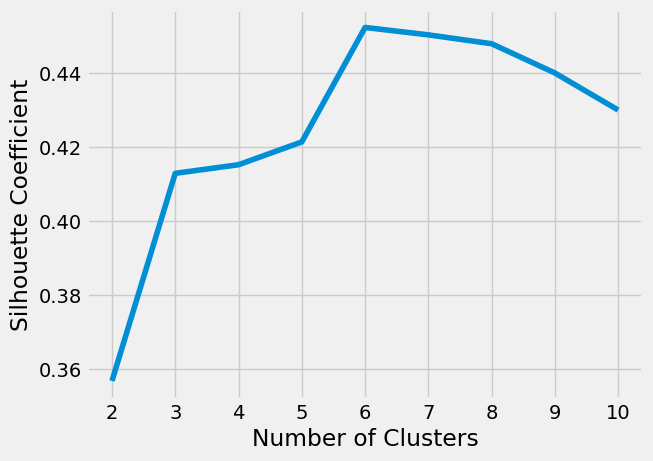

In [76]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()